In [1]:
# import sys
# sys.path.append("../utils")
from utils.generate_field import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import math
from matplotlib import cm, colors
import imageio
import os
result_dir = '/home/zyou6474/tasks/channel_flow'

ModuleNotFoundError: No module named 'utils'

In [10]:
dims = [128, 128, 64]
fdims = [130, 128, 64]
domain = [2*np.pi, np.pi, 1]
x_coords, y_coords, z_coords = xyz(domain, dims)
dx = x_coords[1]- x_coords[0]

In [11]:
# recent result
recent_dir = result_dir + r'/outputs'

dir = recent_dir
t_ind = 1
t_total = 5000
timestep = np.linspace(0, t_total, 51)


In [12]:
# filename of different varaibles
theta_f = dir + r'/theta.01.%.8i'
velocity_f = dir + r'/baseflow/u_base.%.8i'



# Z-index of where the source is located at
z_ind = np.argmin(abs(z_coords-0.5))
print(z_ind)

43


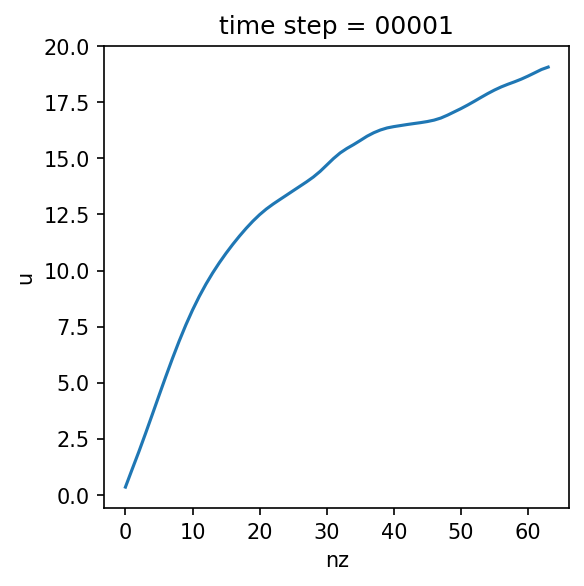

In [13]:
t = 1
# ic_f = '/home/ext-zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/inputs/turbulence_128_128_64/u_velocity.IC'
u = read_array_from_file(velocity_f % t, dims)
# u = read_array_from_file(ic_f, [128, 128, 64])



fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.plot(np.mean(u[:, 10, :], axis=0))
ax.set_title('time step = %.5i' %t)
ax.set_ylabel('u')
ax.set_xlabel('nz')
fig.show()

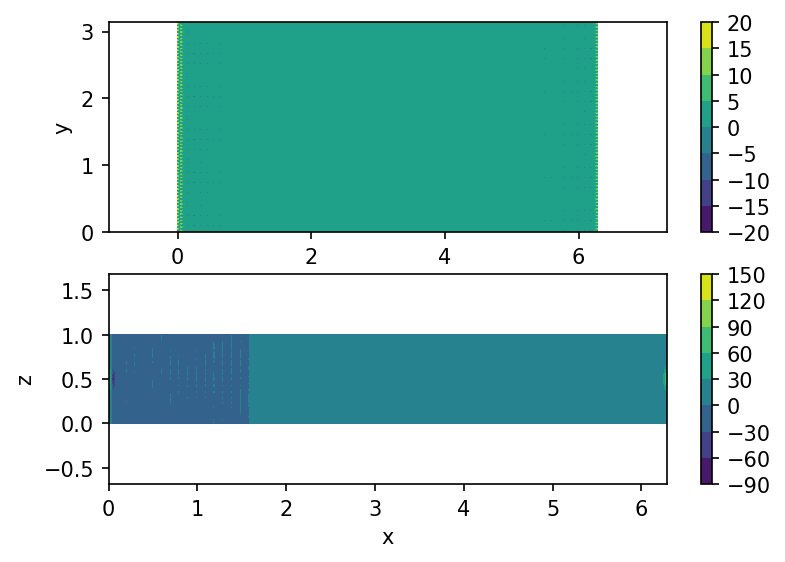

In [18]:
t=1
theta = read_array_from_file(theta_f % t, dims)
# theta[theta<0] =0

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(2, 1, figsize=(6,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, theta[:, :, 32].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')

ax[0].set_ylim(bottom=0)

cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, theta[:, 64, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')

ax[1].set_ylim(bottom=0)

cbar = fig.colorbar(cs1)
fig.show()

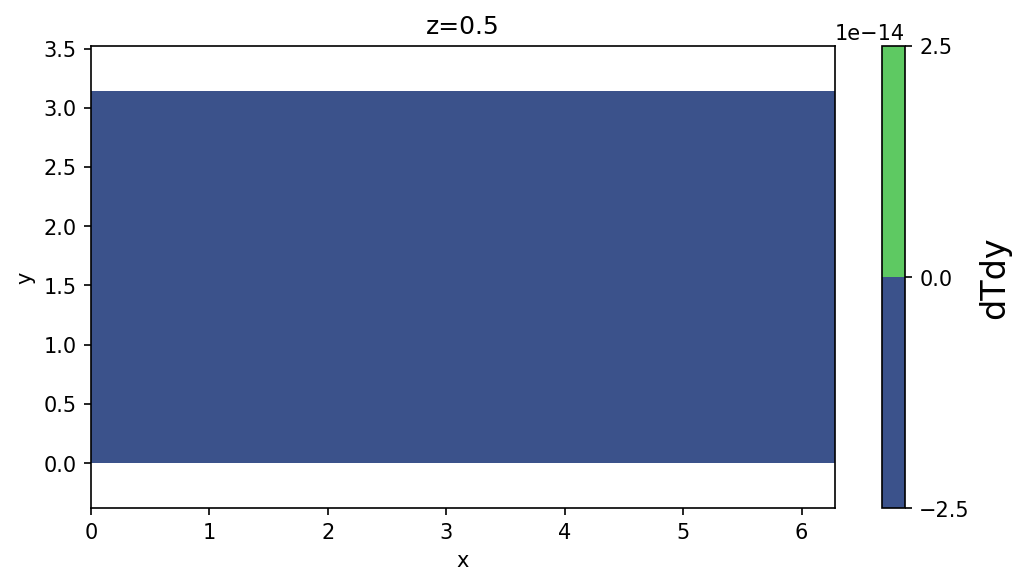

In [15]:
data_f = dir + '/diffusion.%.8i'

dTdy = read_array_from_file(data_f % 1, [128, 128, 64])

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf(x_coords, y_coords, dTdy[:, :, 32].T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_label(r'dTdy', size=16)

ax.set_title('z=0.5')
fig.show()

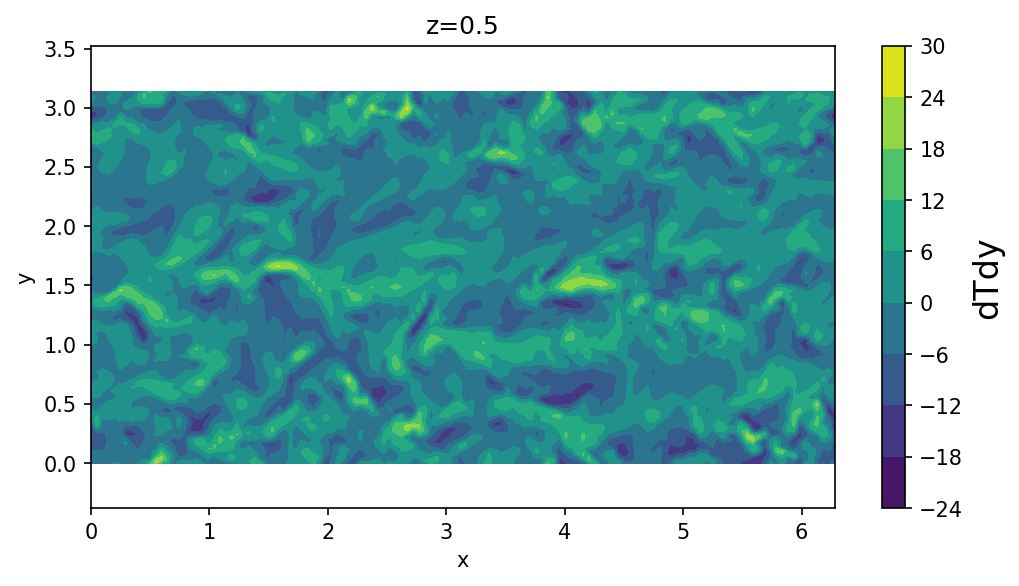

In [16]:
data_f = dir + '/advection.%.8i'

dTdy = read_array_from_file(data_f % 1, [128, 128, 64])

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf(x_coords, y_coords, dTdy[:, :, 32].T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_label(r'dTdy', size=16)

ax.set_title('z=0.5')
fig.show()